In [1]:
import warnings
from pathlib import Path

import gensim

# Widgets
import ipywidgets as widgets
import nltk
import pandas as pd
import pyLDAvis.gensim_models
import spacy
from gensim import corpora
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
from ipywidgets import interact
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

# Pakete für NLP
from wordcloud import WordCloud

InteractiveShell.ast_node_interactivity = "all"

nltk.download("stopwords")  # start the NLTK Downloader and download the stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sebastianh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# LDA and WordCloud on Mastodon Posts for the Bavarian State Election!

## Loading the data from Parquet File


In [2]:
toots_path = Path() / "german_toots.pqt"
german_sentiment_df = pd.read_parquet(toots_path)
german_sentiment_df

,id,user_id,user_name,toot_id,content,date,language,day,week,weekday,hour,cleared_content,has_content?,bavarian_users,followers,mentioned_party,domentent_party,detected_languages,sentiment
0,4,43,taz@squeet.me,110973983344028577,In der Flugblattaffäre sind noch immer viele F...,2023-08-29 15:38:00,de,241,35,2,15,In der Flugblattaffäre sind noch immer viele F...,True,False,18270,fw,fw,de,-0.000564
1,10,5,andreas@social.blogsequenz.de,110973505957085104,<p>Fall jemand meinen uralten Schulranzen im A...,2023-08-29 15:01:57,de,241,35,2,15,Fall jemand meinen uralten Schulranzen im Anti...,True,False,152,"csu, fw",fw,de,-0.944469
2,12,7,stefanmuelller@climatejustice.social,110973482629635037,"<p>7/ Oh, die FW haben 14% in <a href=""https:/...",2023-08-29 14:55:55,de,241,35,2,14,"7/ Oh, die FW haben 14% in Bayern und die noAF...",True,False,1728,fw,fw,de,-0.029815
3,13,8,Sanneforpeace@norden.social,110973467401852205,"<p><span class=""h-card""><a href=""https://socia...",2023-08-29 14:52:09,de,241,35,2,14,"andreas Picasso Na, dann kann ich es mir ja sp...",True,False,172,"csu, fw",fw,de,-0.964399
4,14,9,Azeckenbiss@dju.social,110973331267985860,"<p>""Hinter solchen Flugblatt­aktionen stecke a...",2023-08-29 14:17:28,de,241,35,2,14,Hinter solchen Flugblatt­aktionen stecke also ...,True,False,3257,fw,fw,de,-0.004730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,32934,4501,TerryReintke@respublicae.eu,111433091641512277,"<p>RT by <span class=""h-card""><a href=""https:/...",2023-11-18 19:00:36,en,322,46,6,19,RT by TerryReintke : Eine überfallartig gekape...,True,False,821,afd,afd,de,-0.002703
5597,32951,164,elfentroll@nrw.social,111433356886519829,"<p>MuHa, großdeutscher <a href=""https://nrw.so...",2023-11-18 20:08:06,de,322,46,6,20,"MuHa, großdeutscher AfD - NAZIPuff im bayrisch...",True,False,132,afd,afd,de,-0.427801
5598,32961,1299,0x3mi@mas.to,111433541382809359,"<p><span class=""h-card"" translate=""no""><a href...",2023-11-18 20:55:02,de,322,46,6,20,risa spirelli mich nervt es auch das man kaum ...,True,False,259,linke,linke,de,-0.986509
5599,33009,225,angeldruckt@sueden.social,111433812712832388,"<p><span class=""h-card"" translate=""no""><a href...",2023-11-18 22:04:01,de,322,46,6,22,"BerlinVic Es gibt zu viele Leute, die sie wähl...",True,True,201,fdp,fdp,de,-0.010498


In [3]:
# remove stopwords
nltk_stop_words = set(stopwords.words("german"))  # Selecting nltk stopwords
len(nltk_stop_words)

232

In [4]:
nlp = spacy.load("de_core_news_lg")
spacy_stop_words = set(nlp.Defaults.stop_words)
len(spacy_stop_words)

543

In [5]:
extra_stop_words = {
    "wird",
    "war",
    "werden",
    "hat",
    "haben",
    "nicht",
    "ist",
    "sind",
    "sein",
    "steht",
    "mal",
    "machen",
    "können",
    "ein",
    "einen",
    "noch",
    "da",
    "amp",
    "bleiben",
    "finden",
    "geben",
    "  ",
    " ",
    "",
    "”",
    "+",
    "--",
    "*",
    "&",
    "|",
    "[",
    "]",
    "/",
    "%",
    "'",
    "´´",
    '"',
}
stop_words = nltk_stop_words | spacy_stop_words | extra_stop_words
len(stop_words)

589

In [6]:
german_sentiment_without_stop_words = german_sentiment_df.cleared_content.apply(
    lambda text: " ".join([word.strip() for word in text.lower().split(" ") if word.strip() not in stop_words])
)

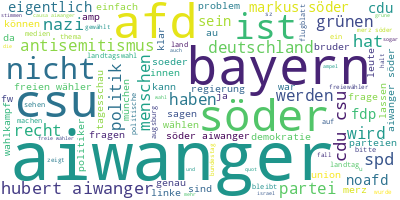

In [7]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
long_string = ",".join(german_sentiment_without_stop_words)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue")
wordcloud.generate(long_string)
wordcloud.to_image()

In [8]:
data_words = []

for words in german_sentiment_without_stop_words:
    doc = nlp(words.lower())
    data_words.append([x.lemma_.lower() for x in doc])

# filter for stopwords after lemmatizing again, just to make sure
data_words = [[x for x in data_word if x not in stop_words] for data_word in data_words]
german_sentiment_df["lemma"] = data_words

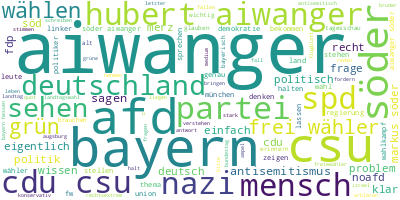

In [9]:
long_string = ",".join([x for data_word in data_words for x in data_word])
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue")
wordcloud.generate(long_string)
wordcloud.to_image()

Text(0.5, 1.0, 'AFD - 658 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'CSU - 1719 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'FDP - 105 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'FW - 2673 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'GRUENE - 167 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'LINKE - 74 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'SPD - 205 posts')

(-0.5, 399.5, 199.5, -0.5)

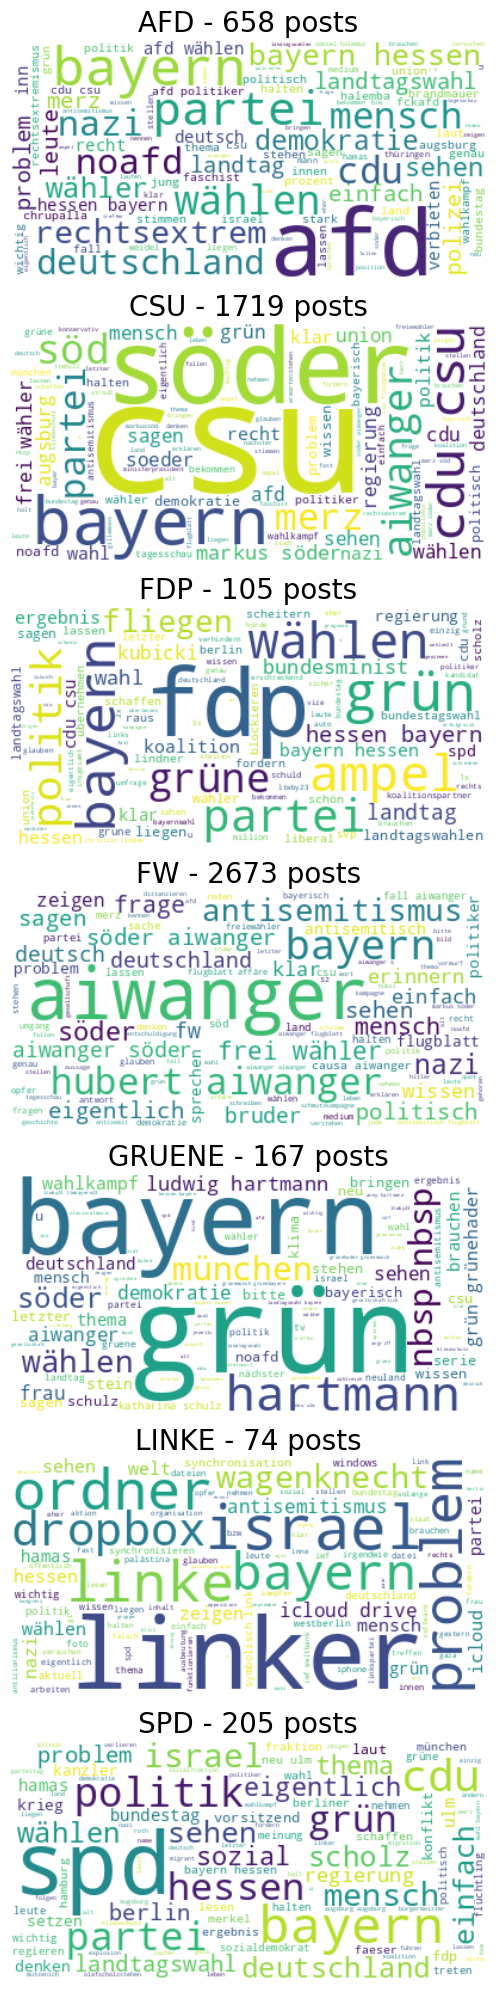

In [10]:
texts = german_sentiment_df.set_index("domentent_party").lemma
party_texts = {}
for i, v in texts.items():
    if i not in party_texts:
        party_texts[i] = [v]
    else:
        party_texts[i].append(v)
parties = set(german_sentiment_df.domentent_party)

fig, axs = plt.subplots(nrows=len(parties), ncols=1, figsize=(20, 20))

for i, party in enumerate(sorted(parties)):
    party_long_text = ",".join([word for text in party_texts[party] for word in text])
    wc = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue").generate(
        party_long_text
    )
    axs[i].imshow(wc, interpolation="bilinear")
    axs[i].set_title(f"{party.upper()} - {len(party_texts[party])} posts", fontsize=20)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

In [11]:
# Quelle: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# filter words that show up less than 15 times, more than 50% of the time and keep it to 10.000 Words
id2word.filter_extremes(no_below=15, no_above=0.50, keep_n=10000)

# Create Corpus
texts = data_words

# Term Document Frequency
# Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
corpus = [id2word.doc2bow(text) for text in texts]

In [12]:
def get_model(
    _corpus: list, _id2word: corpora.Dictionary, _num_topics: int, random_state: float = 0
) -> gensim.models.LdaModel:
    """Get a Multicore Variant of the LDA-Model."""
    return gensim.models.LdaMulticore(corpus=_corpus, id2word=_id2word, num_topics=_num_topics, random_state=random_state)

In [13]:
pyLDAvis.enable_notebook()

In [14]:
num_topics = 15
lda_model = get_model(_corpus=corpus, _id2word=id2word, _num_topics=num_topics, random_state=2)
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.034329 -0.013443       1        1  9.793109
14     0.006863 -0.028252       2        1  8.988417
9     -0.021622 -0.019741       3        1  7.811521
7      0.007494  0.013156       4        1  7.376404
8      0.012938  0.019257       5        1  7.190888
1      0.006063  0.037671       6        1  6.782937
6      0.005005 -0.000427       7        1  6.508278
10    -0.025935 -0.033225       8        1  6.463480
3      0.069780 -0.050541       9        1  6.191504
12    -0.025353 -0.036534      10        1  5.913717
11    -0.038957 -0.001901      11        1  5.830908
5      0.037404 -0.001813      12        1  5.410567
0     -0.023635  0.047866      13        1  5.342441
4      0.033136  0.070345      14        1  5.296847
13    -0.077510 -0.002417      15        1  5.098983, topic_info=           Term         Freq        Total Category  logprob  loglift
11        söder  1239.000000  1239.000000  Default  30.0000  30.0000
335         afd   903.000000   903.000000  Default  29.0000  29.0000
1051   augsburg   244.000000   244.000000  Default  28.0000  28.0000
8        bayern  1212.000000  1212.000000  Default  27.0000  27.0000
148      wähler   355.000000   355.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3         frage    11.711977   224.403530  Topic15  -5.4412   0.0233
73    politiker    10.543239   128.443538  Topic15  -5.5464   0.4761
227       union    11.011819   187.151379  Topic15  -5.5029   0.1432
19          söd    11.381145   278.284309  Topic15  -5.4699  -0.2206
261       sagen    11.105723   271.222753  Topic15  -5.4944  -0.2194

[994 rows x 6 columns], token_table=      Topic      Freq Term
term                      
202       1  0.233380    -
202       2  0.233380    -
202       3  0.046676    -
202       4  0.140028    -
202       5  0.093352    -
...     ...       ...  ...
540      10  0.049279    🤷
540      12  0.098559    🤷
540      13  0.221758    🤷
540      14  0.024640    🤷
540      15  0.024640    🤷

[6244 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 15, 10, 8, 9, 2, 7, 11, 4, 13, 12, 6, 1, 5, 14])

## Topics

Some Topics form cluster. The main cluster consists of the topics 4 to 7. Smaller clusters are 1 & 12 (AFD) and 3, 8, 10. 

The weighting factor λ is applied to rank the terms. λ = 1, means ranking of terms in decreasing order of their *topic*-specific probability and λ = 0 ranking by lift (term probability within a topic over its marginal probability across the corpus). Meaning, λ = 1 favours total probability with the corpus and λ = 0 favours the probability with the current text (see https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf).

The clusters 2, 9, 11, 13, 14 and 15 are isolated.
With λ = 0.5 the moist import terms are:

| Topic | λ = 0                                 | λ = 0.5              | λ = 1                |
|-------|---------------------------------------|----------------------|----------------------|
| 1     | AFD                                   | AFD                  | AFD                  |
| 2     | CDU                                   | CDU, CSU, AFD        | CSU                  |
| 3     | Strauß                                | Söder, CSU           | Söder                |
| 4     | Halemba, sprechen                     | Bayern, CSU          | Bayern, CSU          |
| 5     | freie Wähler                          | freie Wähler, Bayern | freie Wähler, Bayern |
| 6     |                                       | Bayern               | Bayern               |
| 7     | bringen, Ergebnis                     | Bayern               | Bayern               |
| 8     | *laughing emojis*, innen              | CSU, Söder           |                      |
| 9     | Augsburg                              | Augsburg, Söder      | CSU, Söder           |
| 10    | Herr, bekommen                        | Söder, CSU           | Söder, CSU           |
| 11    | br24, denken                          | CSU                  | CSU                  |
| 12    | Dachau, verhalten, Entschuldigung     | AFD                  | AFD                  |
| 13    | Hubsi, *negative emoji*               | Söder, Bayern        | Söder, Bayern        |
| 14    | Verteilen, Interview, Halemba, teilen | CSU, AFD             | AFD, CSU             |
| 15    | denken, einfach, eigentlich           | Söder, CSU           | Söder, CSU           |

## LDA for each party with up to 15 topics

In [15]:
# Create Widgets
w_party = widgets.Select(
    options=parties,
    value="csu",
    description="Party:",
    disabled=False,
)
w_n = widgets.IntSlider(
    value=7,
    min=2,
    max=15,
    step=1,
    description="Topics:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Display Widgets


def update(selected_party: str, _num_topics: int) -> None:
    """Event to recompute the LDA when updating the number of TOPIC and the party."""
    print(f"Selected Party: {selected_party}")
    print(f"Number of Topics: {_num_topics}")

    _id2word = corpora.Dictionary(party_texts[selected_party])
    _id2word.filter_extremes(no_below=15, no_above=0.50, keep_n=10000)

    # Term Document Frequency
    # Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
    _corpus = [_id2word.doc2bow(text) for text in party_texts[w_party.value]]

    _lda_model = get_model(_corpus=_corpus, _id2word=id2word, _num_topics=_num_topics, random_state=2)
    lda_vis_prepared = pyLDAvis.gensim_models.prepare(_lda_model, corpus, id2word)
    display(lda_vis_prepared)


interact(update, selected_party=w_party, _num_topics=w_n)

interactive(children=(Select(description='Party:', options=('csu', 'fw', 'linke', 'spd', 'gruene', 'fdp', 'afd…

<function __main__.update(selected_party: str, _num_topics: int) -> None>